# Project submission: Application of Classification Model
# #Student: Ginju Soumya

This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
(http://www.census.gov/ftp/pub/DES/www/welcome.html) Donor: Ronny Kohavi and Barry Becker, Data
Mining and Visualization Silicon Graphics. e-mail: ronnyk@sgi.com for questions. Split into train-test using
MLC++ GenCVFiles (2/3, 1/3 random). 48842 instances, mix of continuous and discrete (train=32561,
test=16281) 45222 if instances with unknown values are removed (train=30162, test=15060) Duplicate or
conflicting instances : 6 Class probabilities for adult.all file Probability for the label '>50K' : 23.93% / 24.78%
(without unknowns) Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) Extraction was
done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted
using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction
task is to determine whether a person makes over 50K a year. Conversion of original data as follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test. Description of fnlwgt (final weight) The weights on the
CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.
These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of
controls. These are:
5. A single cell estimate of the population 16+ for each state.
6. Controls for Hispanic Origin by age and sex.
7. Controls by Race, age and sex. We use all three sets of controls in our weighting program and "rake"
through them 6 times so that by the end we come back to all the controls we used. The term estimate
refers to population totals derived from CPS by creating "weighted tallies" of any specified socioeconomic
characteristics of the population. People with similar demographic characteristics should have
similar weights. There is one important caveat to remember about this statement. That is that since the
CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the
statement only applies within state. Dataset Link https://archive.ics.uci.edu/ml/machine-learningdatabases/
adult/ (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)

In [83]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
%matplotlib inline

In [84]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

In [85]:
#adding colum names
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

In [48]:
df = pd.read_csv(url, names=columns)

In [49]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
df.shape

(32561, 15)

In [51]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [52]:
df = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [54]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.

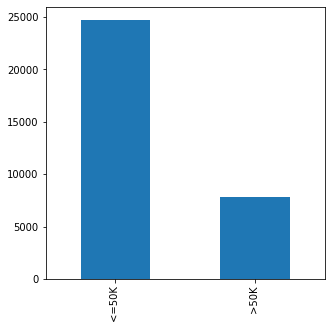

In [55]:
#visualise salary a person makes over 50K in a year
df['salary'].value_counts()
df['salary'].value_counts().plot(kind='bar',figsize=(5,5))

one third of the data shows person makes over 50k in a year

In [86]:
Train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=columns, header = None, sep=' *, *', engine='python')
Test_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=columns, skiprows = 1, sep=' *, *', engine='python', header = None)

In [87]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']

In [88]:
Train_data.columns = col_labels
Test_data.columns = col_labels

In [89]:
Train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [91]:
Test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [92]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


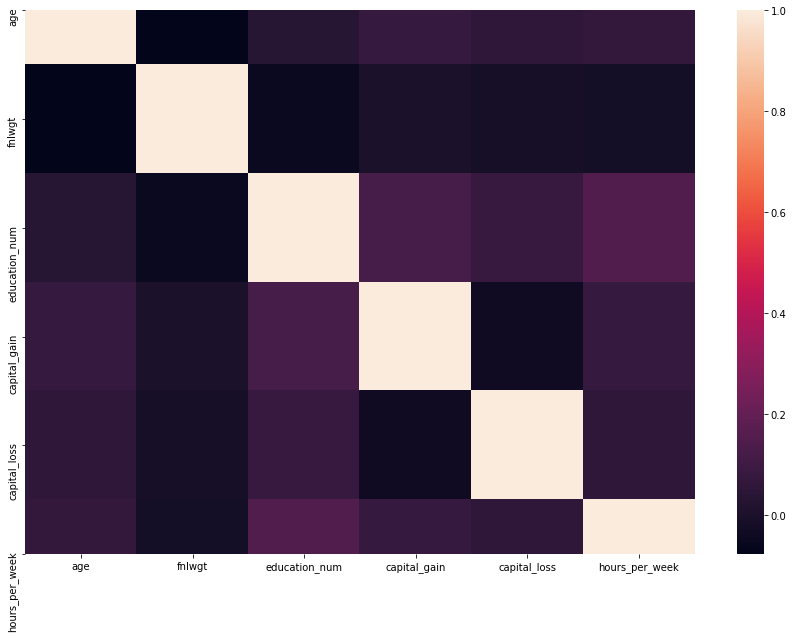

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(Train_data.corr())

In [94]:
Train_data.replace('?', 'Unknown', inplace=True)

In [95]:
Test_data.replace('?', 'Unknown', inplace=True)

Problem 2:
Which factors are important

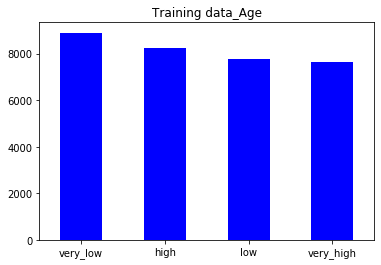

In [96]:
Train_data['Age_Bin'] = pd.qcut(Train_data.age, 4, labels=['very_low','low','high','very_high'])
pd.qcut(Train_data.age, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', title='Training data_Age', color='b', rot=0);

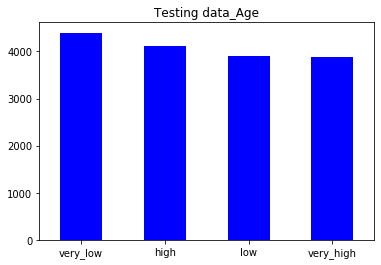

In [97]:
Test_data['Age_Bin'] = pd.qcut(Test_data.age, 4, labels=['very_low','low','high','very_high'])
pd.qcut(Test_data.age, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', title='Testing data_Age', color='b', rot=0);

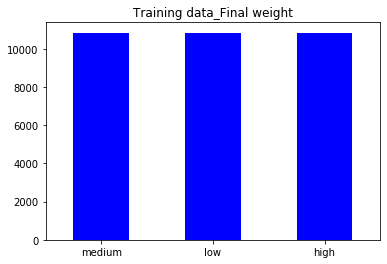

In [98]:
Train_data['Fnlwgt_Bin'] = pd.qcut(Train_data.fnlwgt, 3, labels=['low','medium','high'])
pd.qcut(Train_data.fnlwgt, 3, labels=['low','medium','high']).value_counts().plot(kind='bar', title='Training data_Final weight', color='b', rot=0);

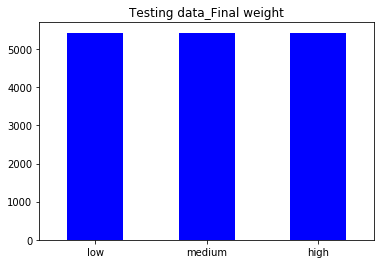

In [99]:
Test_data['Fnlwgt_Bin'] = pd.qcut(Test_data.fnlwgt, 3, labels=['low','medium','high'])
pd.qcut(Test_data.fnlwgt, 3, labels=['low','medium','high']).value_counts().plot(kind=
'bar', title='Testing data_Final weight', color='b', rot=0);

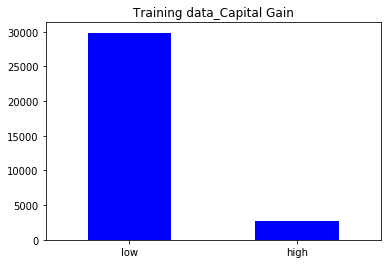

In [100]:
cap_gain = Train_data['capital_gain']
Train_data['Capital_gain_Bin'] = list(map(lambda cap_gain:"low" if(cap_gain==0) else "high", cap_gain))
Train_data.Capital_gain_Bin.value_counts().plot(kind='bar',rot = 0, title='Training data_Capital Gain', color='b');

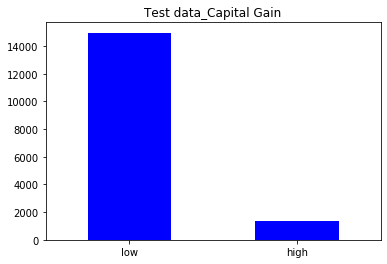

In [101]:
cap_gain = Test_data['capital_gain']
Test_data['Capital_gain_Bin'] = list(map(lambda cap_gain:"low" if(cap_gain==0) else "high", cap_gain))
Test_data.Capital_gain_Bin.value_counts().plot(kind='bar',rot = 0, title='Test data_Capital Gain', color='b');

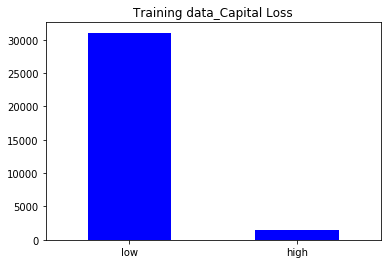

In [102]:
cap_loss = Train_data['capital_loss']
Train_data['Capital_loss_Bin'] = list(map(lambda cap_loss:"low" if(cap_loss==0) else "high", cap_loss))
Train_data.Capital_loss_Bin.value_counts().plot(kind='bar',rot = 0, title='Training data_Capital Loss', color='b');

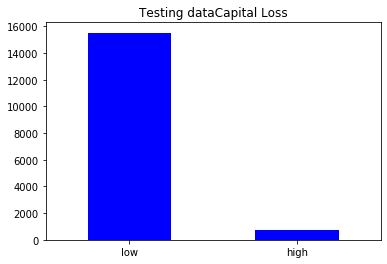

In [103]:
cap_loss = Test_data['capital_loss']
Test_data['Capital_loss_Bin'] = list(map(lambda cap_loss:"low" if(cap_loss==0) else "high", cap_loss))
Test_data.Capital_loss_Bin.value_counts().plot(kind='bar',rot = 0, title='Testing dataCapital Loss', color='b');

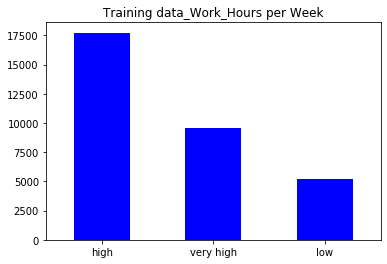

In [104]:
hpw = Train_data['hours_per_week']
Train_data['Hours_per_week_Bin'] = list(map(lambda hpw:"low" if(hpw<=30) else "high" if(hpw>30 and hpw<=40) else "very high", hpw))
Train_data.Hours_per_week_Bin.value_counts().plot(kind='bar',rot = 0, title='Training data_Work_Hours per Week', color='b');

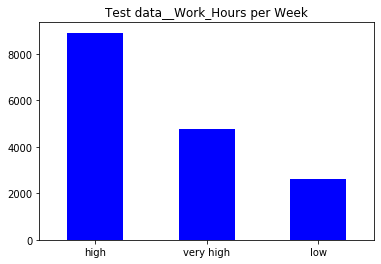

In [105]:
hpw = Test_data['hours_per_week']
Test_data['Hours_per_week_Bin'] = list(map(lambda hpw:"low" if(hpw<=30) else "high" if(hpw>30 and hpw<=40) else "very high", hpw))
Test_data.Hours_per_week_Bin.value_counts().plot(kind='bar',rot = 0, title='Test data__Work_Hours per Week', color='b');

In [108]:
#Encoding
Train_dummies_age_bin = pd.get_dummies(Train_data.Age_Bin, drop_first=True, prefix='Age')
Train_dummies_fnlwgt_bin = pd.get_dummies(Train_data.Fnlwgt_Bin, drop_first=True, prefix='Fnlwgt')
Train_dummies_capital_gain_bin = pd.get_dummies(Train_data.Capital_gain_Bin, drop_first=True, prefix='Capital_gain')
Train_dummies_capital_loss_bin = pd.get_dummies(Train_data.Capital_loss_Bin, drop_first=True, prefix='Capital_loss')
Train_dummies_hours_per_week_bin = pd.get_dummies(Train_data.Hours_per_week_Bin, drop_first=True, prefix='Hours_per_week')

In [109]:
Train_data = Train_data.join([Train_dummies_age_bin,Train_dummies_fnlwgt_bin,Train_dummies_capital_gain_bin,Train_dummies_capital_loss_bin,Train_dummies_hours_per_week_bin])

In [110]:
Train_data = Train_data.drop(['age','Age_Bin','fnlwgt','Fnlwgt_Bin','capital_gain','Capital_gain_Bin','capital_loss','Capital_loss_Bin','hours_per_week','Hours_per_week_Bin'],axis=1)

In [111]:
Train_data.head()

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,native_country,wage_class,Age_low,Age_high,Age_very_high,Fnlwgt_medium,Fnlwgt_high,Capital_gain_low,Capital_loss_low,Hours_per_week_low,Hours_per_week_very high
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0,1,0,0,0,0,1,0,0
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0,0,1,0,0,1,1,1,0
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0,1,0,0,1,1,1,0,0
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0,0,1,0,1,1,1,0,0
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0,0,0,0,1,1,1,0,0


Important factors aftecting on high salary are: <brk>  
    
workclass <brk>  
age <brk>  
workclass <brk>  
occupation <brk>  
relationship <brk>  
race <brk>  
sex <brk>  
native-country <brk>  
capital-loss <brk>  
fnlwgt <brk> 

Problem 3:
Which algorithms are best for this dataset

Logistic regression is the fatest, also Random forest, linear regression, naive bayes,
knn can be used.